In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import autoreload
import csv
import os
import sys

from wordcloud import STOPWORDS, WordCloud
from collections import defaultdict, Counter

%matplotlib inline
%reload_ext autoreload
%autoreload 2

sb.set_style("dark")
sb.set()

#### Exploratory Data Analysis [EDA] for Student Perfomace in exams

In [4]:
df = pd.read_csv("D:\Open Classroom\Data Files\Student Performance in Exams\StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.describe().round()

,math score,reading score,writing score
count,1000.0,1000.0,1000.0
mean,66.0,69.0,68.0
std,15.0,15.0,15.0
min,0.0,17.0,10.0
25%,57.0,59.0,58.0
50%,66.0,70.0,69.0
75%,77.0,79.0,79.0
max,100.0,100.0,100.0


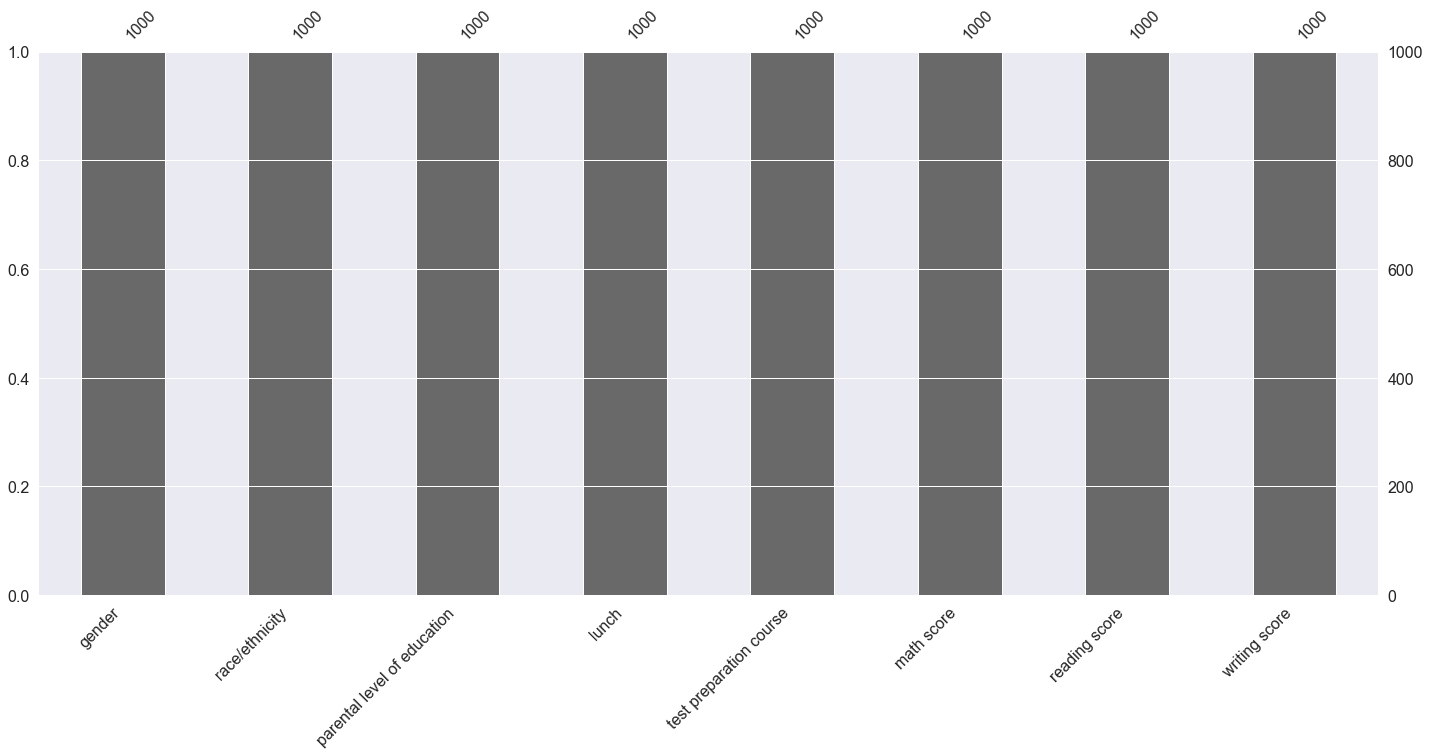

In [18]:
msno.bar(df)

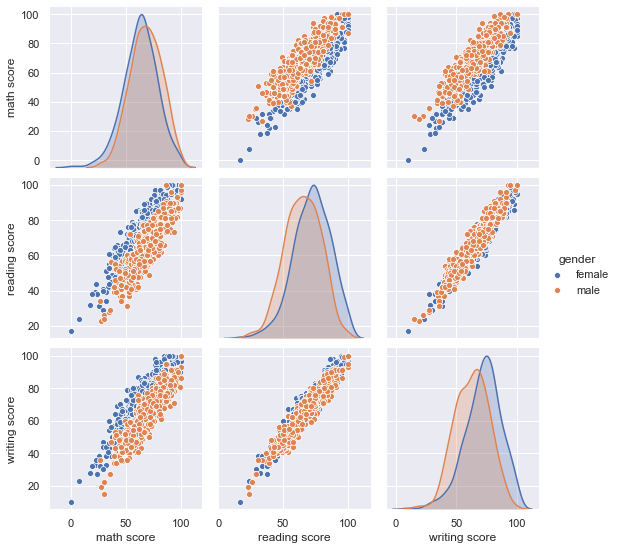

In [22]:
sb.pairplot(data = df, hue = "gender")

In [25]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Text(0.5, 1.0, 'Correlation Relationship Based on Exam Scores')

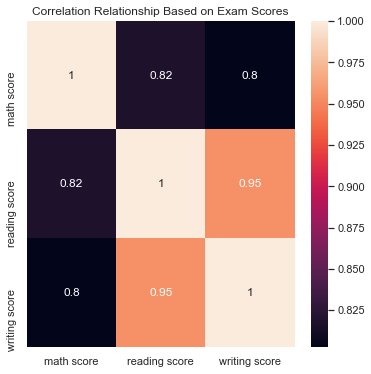

In [33]:
plt.figure(figsize = (6, 6))
sb.heatmap(df.corr(), annot = True)
plt.title("Correlation Relationship Based on Exam Scores")

Text(0.5, 1.0, 'Parental Level of Education Based on Gender')

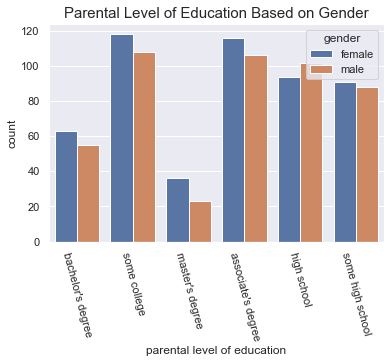

In [42]:
gender = df.groupby("gender")
sb.countplot(x = "parental level of education", data = df, hue = "gender")
plt.xticks(rotation = -75)
plt.title("Parental Level of Education Based on Gender", fontsize = 15)

In [46]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_score
0,female,group B,bachelor's degree,standard,none,72,72,74,NaN
1,female,group C,some college,standard,completed,69,90,88,NaN
2,female,group B,master's degree,standard,none,90,95,93,NaN
3,male,group A,associate's degree,free/reduced,none,47,57,44,NaN
4,male,group C,some college,standard,none,76,78,75,NaN


In [52]:
df["mean_score"] = df[["math score", "reading score", "writing score"]].mean(axis = 1).round()
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0


In [53]:
df.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

In [54]:
df["race/ethnicity"].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [55]:
df["parental level of education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [56]:
df["lunch"].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [63]:
df["test preparation course"].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

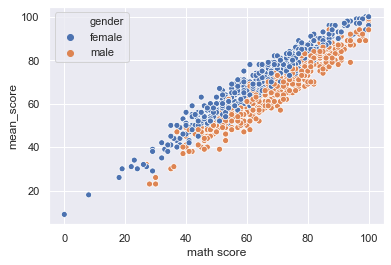

In [65]:
sb.scatterplot(x = "math score", y = "mean_score", data = df, hue = "gender")